In [693]:
import sklearn
import sklearn.preprocessing
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np
from IPython.display import display, HTML 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import GaussianNoise
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

RANDOM_SEED = 0
np.random.seed(RANDOM_SEED)

%matplotlib inline
from pandas.plotting import scatter_matrix
matplotlib.rcParams['figure.figsize'] = (10, 6)

### Dataset Cleaning and reformat

In [694]:
data = pd.read_csv('data/PRSA_data_2010.1.1-2014.12.31.csv')
data.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [695]:
data["timestamp"] = pd.to_datetime(data[["year", "month", "day", "hour"]])

In [696]:
data.drop(["No"], axis=1, inplace=True) 

In [697]:
data = data.set_index("timestamp")

In [698]:
# New index dataset
data.head(10)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,,,,,
2010-01-01 00:00:00,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [699]:
# Shape
print(data.shape)

(43824, 12)


In [700]:
# Drop rows with NAN value 
data = data.dropna()
data.head(10)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
2010-01-02 05:00:00,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0
2010-01-02 06:00:00,2010,1,2,6,105.0,-7,-6.0,1023.0,SE,8.93,4,0
2010-01-02 07:00:00,2010,1,2,7,124.0,-7,-5.0,1024.0,SE,10.72,0,0
2010-01-02 08:00:00,2010,1,2,8,120.0,-8,-6.0,1024.0,SE,12.51,0,0


In [701]:
# Shape
print(data.shape)

(41757, 12)


In [702]:
# Factorize String data
data.loc[:, 'cbwd'] = pd.factorize(data.loc[:, 'cbwd'])[0]
data.head(10)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,0,1.79,0,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,0,2.68,0,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,0,3.57,0,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,0,5.36,1,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,0,6.25,2,0
2010-01-02 05:00:00,2010,1,2,5,109.0,-7,-6.0,1022.0,0,7.14,3,0
2010-01-02 06:00:00,2010,1,2,6,105.0,-7,-6.0,1023.0,0,8.93,4,0
2010-01-02 07:00:00,2010,1,2,7,124.0,-7,-5.0,1024.0,0,10.72,0,0
2010-01-02 08:00:00,2010,1,2,8,120.0,-8,-6.0,1024.0,0,12.51,0,0


In [703]:
# Saved cleaned data
data.to_csv('data/cleaned_data')

### Data Static Summary

In [704]:
print(data.describe())

               year         month           day          hour         pm2.5  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean    2012.042771      6.513758     15.685514     11.502311     98.613215   
std        1.415311      3.454199      8.785539      6.924848     92.050387   
min     2010.000000      1.000000      1.000000      0.000000      0.000000   
25%     2011.000000      4.000000      8.000000      5.000000     29.000000   
50%     2012.000000      7.000000     16.000000     12.000000     72.000000   
75%     2013.000000     10.000000     23.000000     18.000000    137.000000   
max     2014.000000     12.000000     31.000000     23.000000    994.000000   

               DEWP          TEMP          PRES          cbwd           Iws  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean       1.750174     12.401561   1016.442896      1.201715     23.866747   
std       14.433658     12.175215     10.300733    

### Dataset Visualization

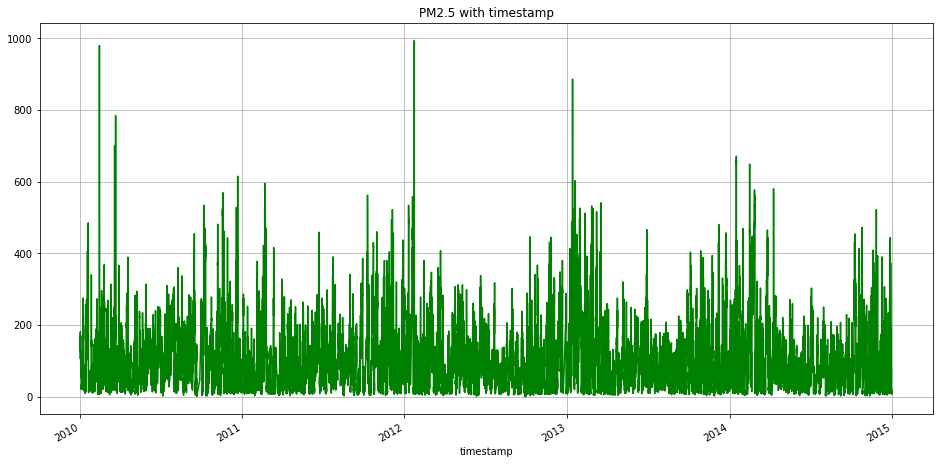

In [705]:
# Show how data looks like
plt.figure(figsize=[16, 8])
data['pm2.5'].plot(kind='line',color='green',grid=True)
plt.title("PM2.5 with timestamp");

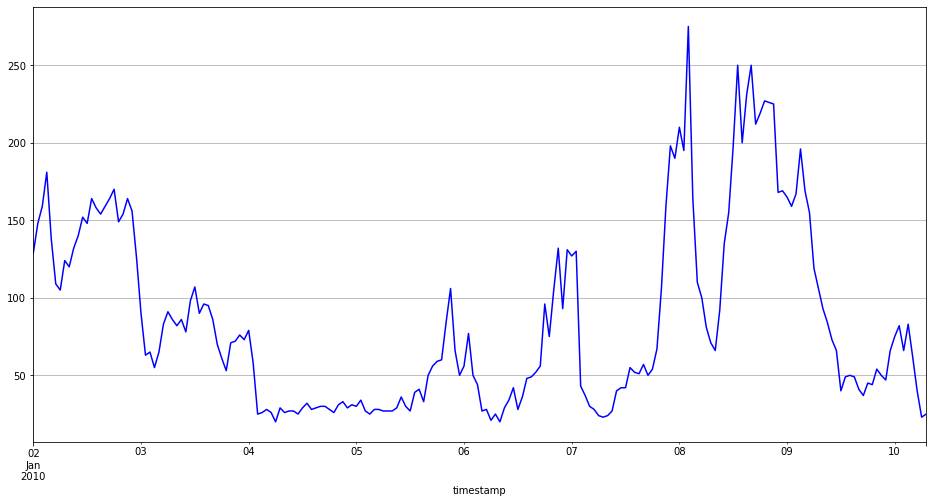

In [706]:
# Show one month zoom in pm2.5 data
plt.figure(figsize=[16, 8])
data['pm2.5'][:200].plot(kind='line',color='blue',grid=True);

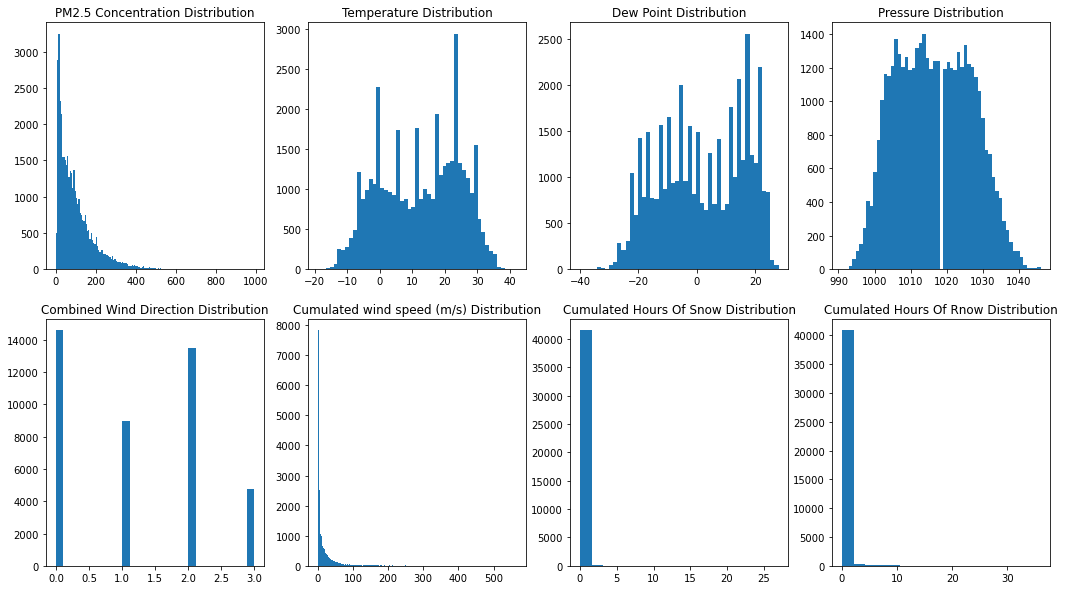

In [707]:
# plot the data distribution
content_list = ['pm2.5', 'TEMP', 'DEWP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']
title_list = ['PM2.5 Concentration Distribution', 'Temperature Distribution', 'Dew Point Distribution', \
             'Pressure Distribution', 'Combined Wind Direction Distribution', 'Cumulated wind speed (m/s) Distribution', \
             'Cumulated Hours Of Snow Distribution', 'Cumulated Hours Of Rnow Distribution']

plt.figure(figsize=(18,10))
for i in range(len(content_list)):
    plt.subplot(2, 4, i+1)
    plt.hist(data[content_list[i]], bins='auto')
    plt.title(title_list[i])

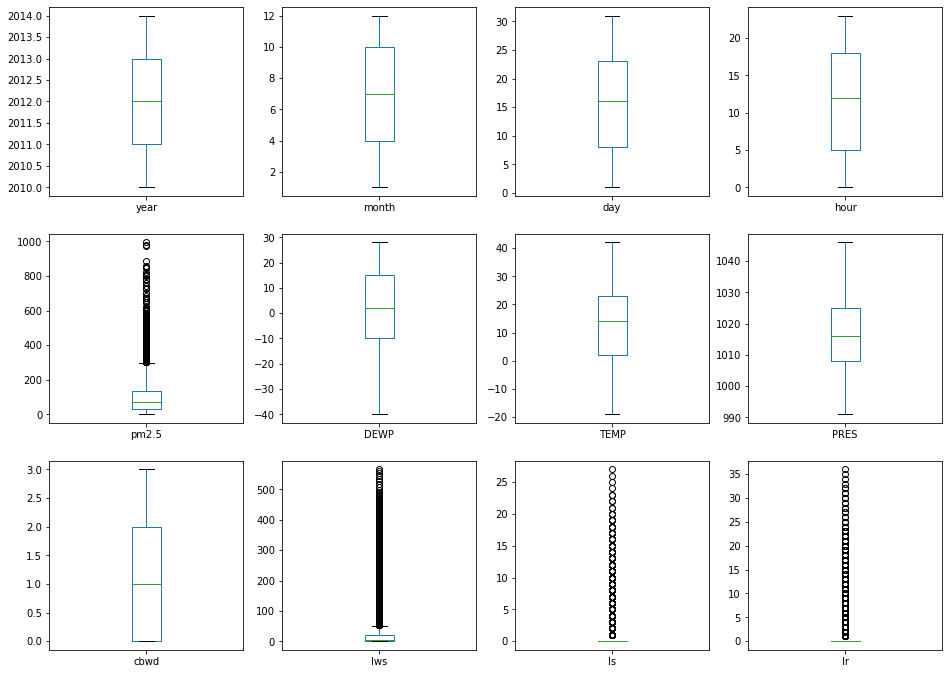

In [708]:
# Univariate plot
data.plot(kind='box', subplots=True, layout=(4,4), figsize=[16,16], sharex=False, sharey=False);

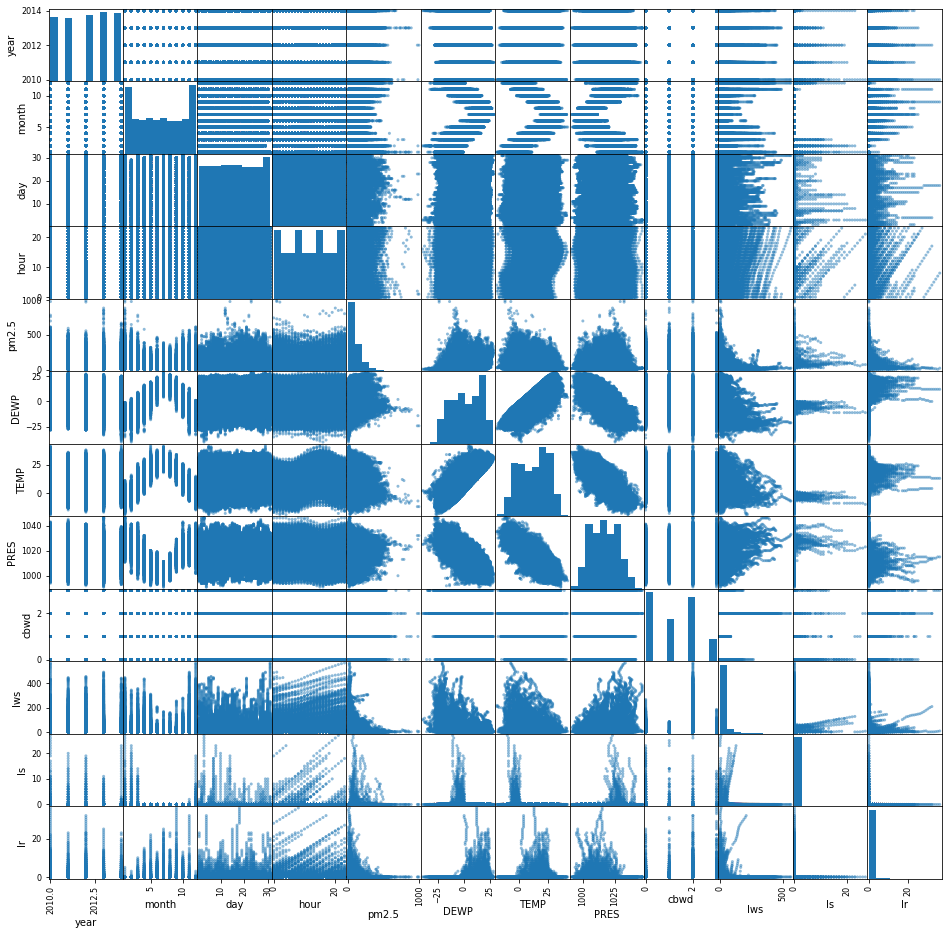

In [709]:
# Multivariate Plots
scatter_matrix(data,figsize=[16,16])
plt.show()

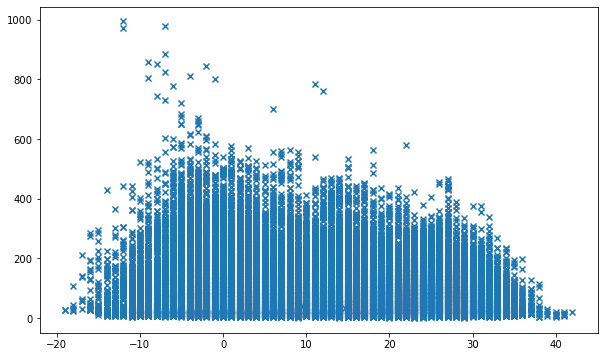

In [710]:
# Zoom in the relation between temp and pm2.5
plt.scatter(data['TEMP'], data['pm2.5'], marker= "x")

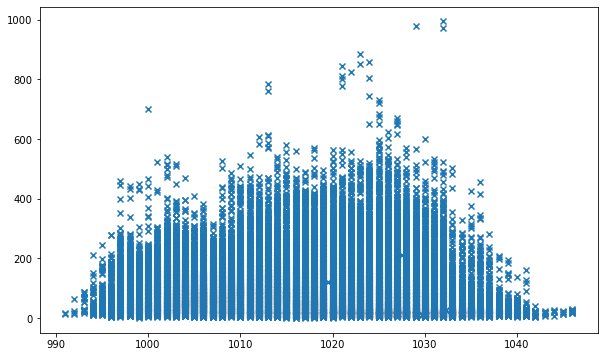

In [711]:
# Zoom in the relation between PRES and pm2.5
plt.scatter(data['PRES'], data['pm2.5'], marker= "x")

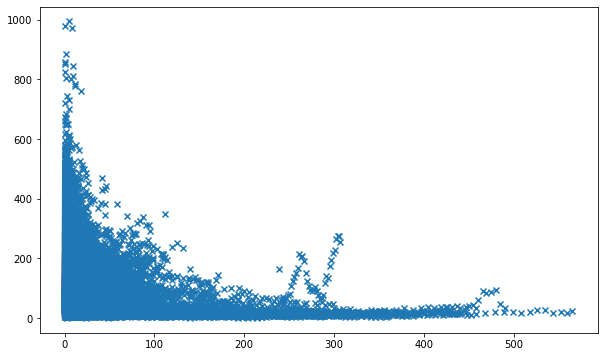

In [712]:
# Zoom in the relation between Iws and pm2.5
plt.scatter(data['Iws'], data['pm2.5'], marker= "x")

### Data Wrangling

In [713]:
# Sign a new column
data = data.assign(anom=pd.Series(np.zeros(len(data), dtype=np.int)).values)
data

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,anom
timestamp,,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,0,1.79,0,0,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,0,2.68,0,0,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,0,3.57,0,0,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,0,5.36,1,0,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,0,6.25,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,2,231.97,0,0,0
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,2,237.78,0,0,0
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,2,242.70,0,0,0


In [714]:
df25 = data.loc[:, 'pm2.5']
df25

timestamp
2010-01-02 00:00:00    129.0
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
                       ...  
2014-12-31 19:00:00      8.0
2014-12-31 20:00:00     10.0
2014-12-31 21:00:00     10.0
2014-12-31 22:00:00      8.0
2014-12-31 23:00:00     12.0
Name: pm2.5, Length: 41757, dtype: float64

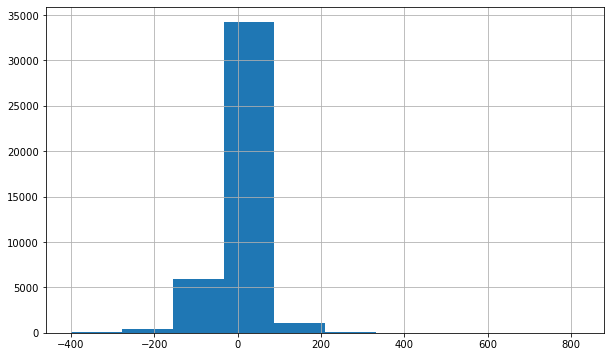

In [715]:
# Different rolling window for labeling
# Rolling window 12hrs
df25_12_column = df25 - df25.rolling(12).mean()
df25_12_column.name = 'diff_12hr_pm2.5'
df25_12_column.hist();

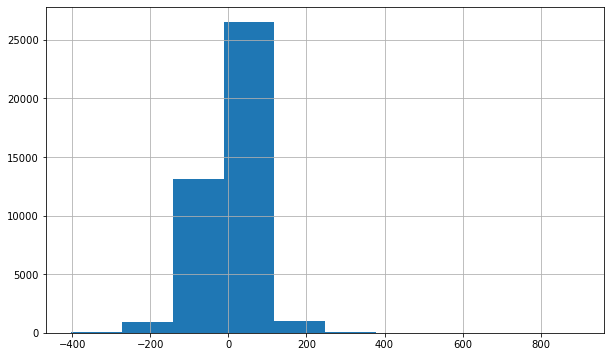

In [716]:
# Rolling window 24hrs
df25_24_column = df25 - df25.rolling(24).mean()
df25_24_column.name = 'diff_24hr_pm2.5'
df25_24_column.hist();

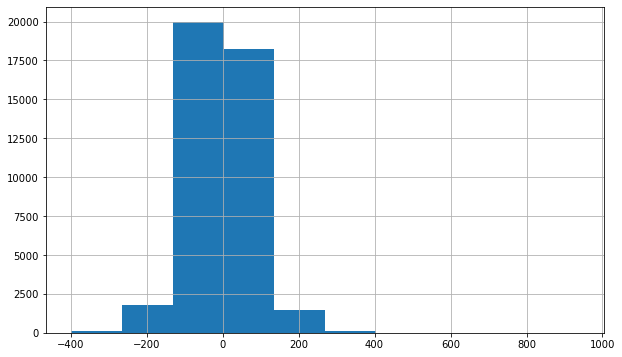

In [717]:
# Rolling window 48hrs
df25_48_column = df25 - df25.rolling(48).mean()
df25_48_column.name = 'diff_48hr_pm2.5'
df25_48_column.hist();

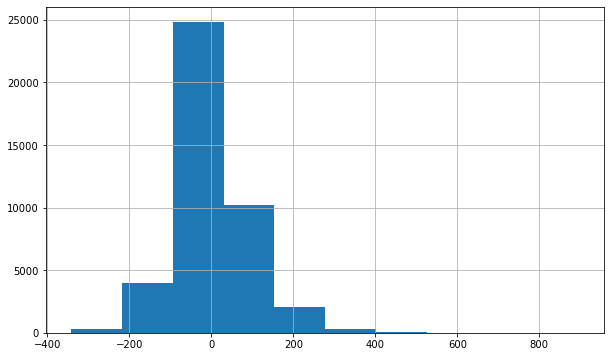

In [718]:
# Rolling window 144hrs
df25_144_column = df25 - df25.rolling(144).mean()
df25_144_column.name = 'diff_144hr_pm2.5'
df25_144_column.hist();

In [719]:
# Declear window list
window_list = [df25_12_column, df25_24_column, df25_48_column, df25_144_column]

In [720]:
df25_24_column

timestamp
2010-01-02 00:00:00         NaN
2010-01-02 01:00:00         NaN
2010-01-02 02:00:00         NaN
2010-01-02 03:00:00         NaN
2010-01-02 04:00:00         NaN
                         ...   
2014-12-31 19:00:00   -3.291667
2014-12-31 20:00:00   -0.625000
2014-12-31 21:00:00   -0.208333
2014-12-31 22:00:00   -2.208333
2014-12-31 23:00:00    1.958333
Name: diff_24hr_pm2.5, Length: 41757, dtype: float64

In [721]:
def get_new_dataframe_with_anomaly_label(original_dataset, window_column_series):
    newdata = pd.concat([data, window_column_series], axis=1)
    newdata.columns.values[-1] = 'diff_pm_2.5'
    newdata.loc[newdata['diff_pm_2.5'] >= 3*(newdata['diff_pm_2.5']).std(),'anom'] = 1
    plt.figure(figsize=(16,8))
    plt.plot(newdata['pm2.5'], markevery=newdata['anom']==1, marker='x', markeredgecolor='red', color='green',markersize=10)
    #print(newdata([newdata['anom']==1]).head(10))
    print('{0} total anomaly numbers : {1}'.format(window_column_series.name,len(newdata[newdata['anom']==1])))
    plt.title('Window size : {0}'.format(window_column_series.name))
    return newdata

In [722]:
newdata = pd.concat([data, df25_24_column], axis=1)
newdata

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,anom,diff_24hr_pm2.5
timestamp,,,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,0,1.79,0,0,0,NaN
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,0,2.68,0,0,0,NaN
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,0,3.57,0,0,0,NaN
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,0,5.36,1,0,0,NaN
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,0,6.25,2,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,2,231.97,0,0,0,-3.291667
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,2,237.78,0,0,0,-0.625000
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,2,242.70,0,0,0,-0.208333


In [723]:
# newdata.columns.values[-1] = 'diff_pm_2.5'
# newdata

In [724]:
# scatter_matrix(newdata,figsize=[16,16])
# plt.plot()

In [725]:
newdata.loc[newdata['diff_24hr_pm2.5'] >= 3*(newdata['diff_24hr_pm2.5']).std(),'anom'] = 1

In [726]:
newdata[newdata['anom'] == 1]

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,anom,diff_24hr_pm2.5
timestamp,,,,,,,,,,,,,,
2010-01-08 02:00:00,2010,1,8,2,275.0,-20,-16.0,1031.0,3,0.89,0,0,1,190.166667
2010-01-14 01:00:00,2010,1,14,1,257.0,-20,-15.0,1025.0,3,2.67,0,0,1,204.250000
2010-01-16 03:00:00,2010,1,16,3,271.0,-16,-13.0,1035.0,3,0.89,0,0,1,194.541667
2010-01-26 20:00:00,2010,1,26,20,274.0,-11,-5.0,1020.0,3,0.89,0,0,1,200.583333
2010-01-26 21:00:00,2010,1,26,21,340.0,-13,-6.0,1020.0,2,1.79,0,0,1,253.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-09 15:00:00,2014,12,9,15,390.0,-8,0.0,1031.0,1,0.89,0,0,1,283.541667
2014-12-09 16:00:00,2014,12,9,16,375.0,-8,0.0,1031.0,1,1.78,0,0,1,253.625000
2014-12-09 17:00:00,2014,12,9,17,367.0,-8,0.0,1031.0,3,0.89,0,0,1,231.083333


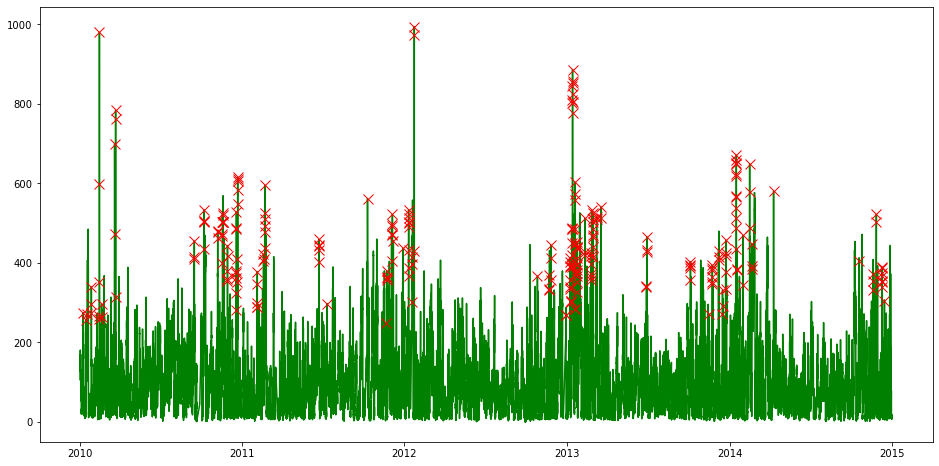

In [727]:
#Flag Anormalies
plt.figure(figsize=(16,8))
plt.plot(newdata['pm2.5'], markevery=newdata['anom']==1, marker='x', markeredgecolor='red', color='green',markersize=10)

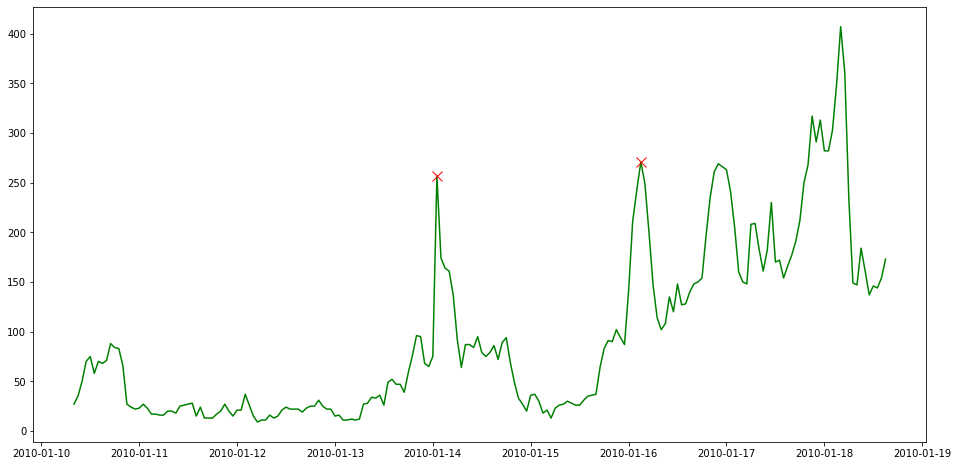

In [728]:
#Flag Anormalies
plt.figure(figsize=(16,8))
plt.plot(newdata['pm2.5'][200:400], markevery=newdata['anom'][200:400]==1, marker='x', markeredgecolor='red', color='green',markersize=10)

diff_12hr_pm2.5 total anomaly numbers : 262
diff_24hr_pm2.5 total anomaly numbers : 251
diff_48hr_pm2.5 total anomaly numbers : 263
diff_144hr_pm2.5 total anomaly numbers : 384


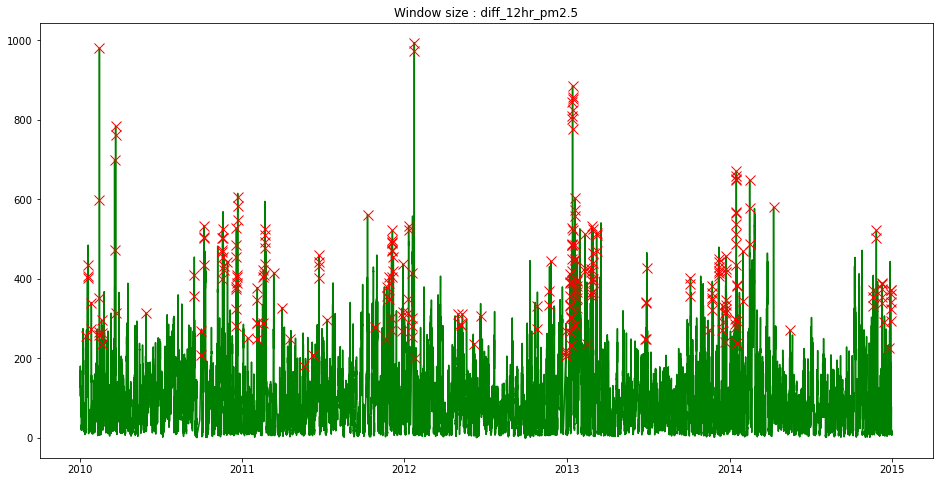

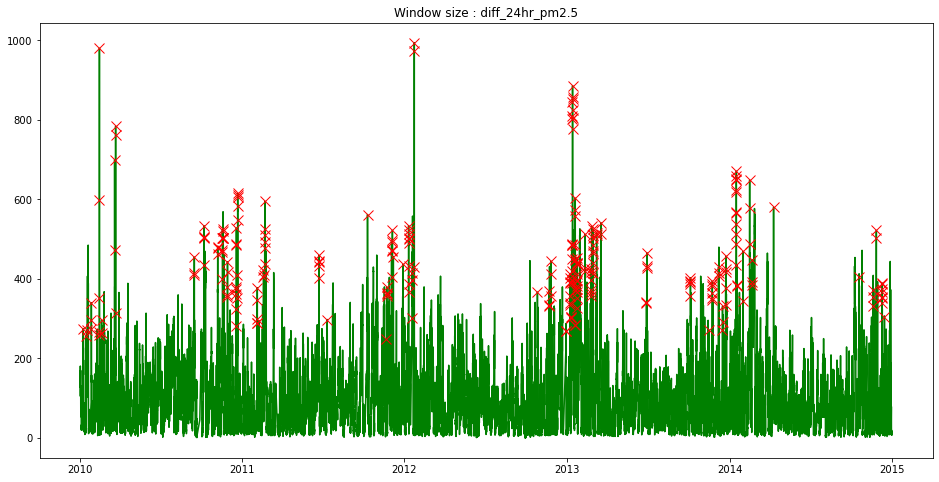

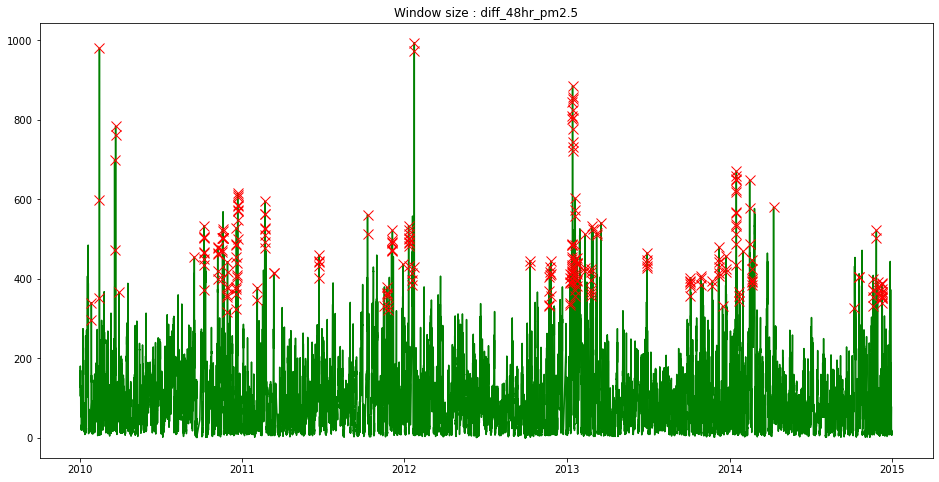

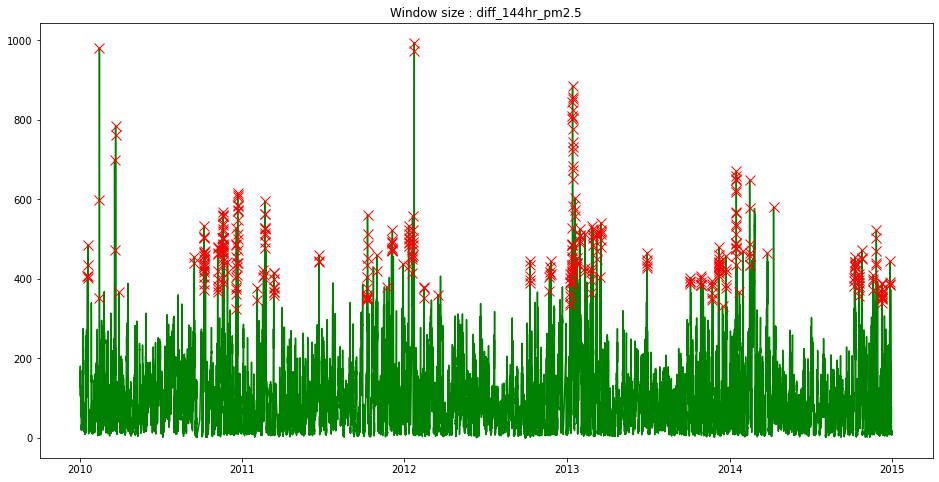

In [729]:
newdata_list = []
for i in window_list:
    #print(i)
    newdata_list.append(get_new_dataframe_with_anomaly_label(data, i))

In [730]:
# All 4 dataframe
newdata_list

[                     year  month  day  hour  pm2.5  DEWP  TEMP    PRES  cbwd  \
 timestamp                                                                      
 2010-01-02 00:00:00  2010      1    2     0  129.0   -16  -4.0  1020.0     0   
 2010-01-02 01:00:00  2010      1    2     1  148.0   -15  -4.0  1020.0     0   
 2010-01-02 02:00:00  2010      1    2     2  159.0   -11  -5.0  1021.0     0   
 2010-01-02 03:00:00  2010      1    2     3  181.0    -7  -5.0  1022.0     0   
 2010-01-02 04:00:00  2010      1    2     4  138.0    -7  -5.0  1022.0     0   
 ...                   ...    ...  ...   ...    ...   ...   ...     ...   ...   
 2014-12-31 19:00:00  2014     12   31    19    8.0   -23  -2.0  1034.0     2   
 2014-12-31 20:00:00  2014     12   31    20   10.0   -22  -3.0  1034.0     2   
 2014-12-31 21:00:00  2014     12   31    21   10.0   -22  -3.0  1034.0     2   
 2014-12-31 22:00:00  2014     12   31    22    8.0   -22  -4.0  1034.0     2   
 2014-12-31 23:00:00  2014  

In [731]:
# we use the first dataset in newdata_list in our project
newdata = newdata_list[3]
# drop the first few lines with NaN in diff_pm_2.5
newdata = newdata.dropna()
tag = newdata['anom'].copy()

In [732]:
# this part is refer to "https://www.kaggle.com/robinteuwens/anomaly-detection-with-auto-encoders"
# manual parameter 
RATIO_TO_ANOMALY = 10

# splitting by class
anomaly = newdata[newdata.anom == 1]
normal = newdata[newdata.anom == 0]

# undersample clean transactions
normal_undersampled = normal.sample(
    int(len(anomaly) * RATIO_TO_ANOMALY),
    random_state=RANDOM_SEED
)

# concatenate with fraud transactions into a single dataframe
visualisation_initial = pd.concat([anomaly, normal_undersampled])
column_names = list(visualisation_initial.drop('anom', axis=1).columns)

# isolate features from labels 
features, labels = visualisation_initial.drop('anom', axis=1).values, \
                   visualisation_initial.anom.values


def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d')
    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    # counting dimensions
    if dimensions == 3: ax = fig.add_subplot(111, projection='3d')
    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Anomaly'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Normal'
    )
                         
    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as)
    plt.show

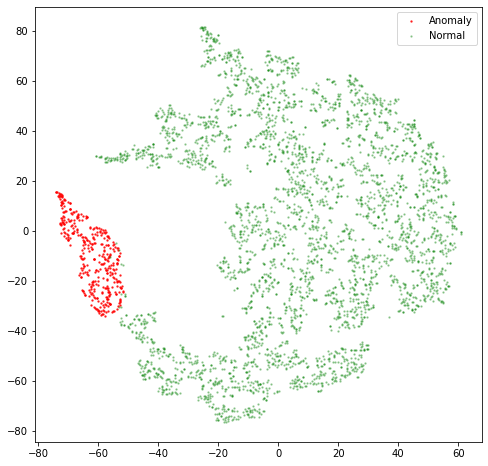

In [733]:
# print the t-sne
tsne_scatter(features, labels, dimensions=2, save_as='tsne_initial_2d.png')

In [734]:
# Your code here. Aim for 2-3 lines.
from sklearn.model_selection import train_test_split
training_data, testing_data, training_data_tag, testing_data_tag = train_test_split(newdata, tag, test_size=0.2, random_state=42)
pure_training_data, validation_training_data, pure_training_tag, validation_training_tag = train_test_split(training_data, training_data_tag, test_size=0.25, random_state=42)

In [743]:
# generate normal/anomaly data mask
normal_mask = pure_training_data['anom']==0
anomaly_mask = pure_training_data['anom']==1

normal_pure_training_tag = pure_training_tag[normal_mask]
anomaly_pure_training_tag = pure_training_tag[anomaly_mask]

# normalize the pure training data
pure_training_data=(pure_training_data-pure_training_data.mean())/pure_training_data.std()

# normalize the validation data
validation_training_data=(validation_training_data-validation_training_data.mean())/validation_training_data.std()

# normalize the testing data
testing_data = (testing_data-testing_data.mean())/testing_data.std()

# make a copy for seperate purpose
whole_data = newdata.copy()
whole_data.drop('anom',axis=1,inplace=True)
whole_data_wot = whole_data.values

In [744]:
# the autoencoder does not need to know the tag information and some other information for tag purpose, so drop it
pure_training_data.drop('anom',axis=1,inplace=True)
pure_training_data.drop('diff_pm_2.5',axis=1,inplace=True)

validation_training_data.drop('anom',axis=1,inplace=True)
validation_training_data.drop('diff_pm_2.5',axis=1,inplace=True)

testing_data.drop('anom',axis=1,inplace=True)
testing_data.drop('diff_pm_2.5',axis=1,inplace=True)

In [745]:
df_normal = pure_training_data[normal_mask]
df_anomaly = pure_training_data[anomaly_mask]

In [746]:
x_normal_train = df_normal.values
X_anomaly = df_anomaly.values
x_normal_validation = validation_training_data.values
X_testing = testing_data.values

In [748]:
model_list = []
history_list = []
hidden_layer_list = []
for outlayer_dim in range(3, 12):
    for inlayer_dim in range(2, outlayer_dim):
        hidden_layer_list.append(F"Hidden layer {outlayer_dim} + {inlayer_dim} + {outlayer_dim}")
        model = Sequential()
        model.add(Dense(outlayer_dim, input_dim=x_normal_train.shape[1], activation='relu'))
        model.add(Dense(inlayer_dim, activation='relu')) # latent code layer
        model.add(Dense(outlayer_dim, activation='relu'))
        model.add(Dense(x_normal_train.shape[1])) # Multiple output neurons
        model.compile(loss='mean_squared_error', optimizer='adam')
        history = model.fit(x_normal_train, x_normal_train, 
                  epochs=100, 
                  batch_size=512,
                  validation_data=(x_normal_validation, x_normal_validation),
                  shuffle=True)
        model_list.append(model)
        history_list.append(history)

Train on 24737 samples, validate on 8323 samples
Epoch 1/100
24737/24737 [==============================] - 19s 782us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 2/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 3/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 4/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 5/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 6/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 7/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 8/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 9/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9

Epoch 76/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 77/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 78/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 79/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 80/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 81/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 82/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 83/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 84/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.9888 - val_loss: 1.0000
Epoch 85/100
24737/

Epoch 51/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6425 - val_loss: 0.6530
Epoch 52/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.6424 - val_loss: 0.6530
Epoch 53/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.6423 - val_loss: 0.6529
Epoch 54/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6421 - val_loss: 0.6530
Epoch 55/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6420 - val_loss: 0.6528
Epoch 56/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6419 - val_loss: 0.6527
Epoch 57/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6419 - val_loss: 0.6527
Epoch 58/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.6418 - val_loss: 0.6527
Epoch 59/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6418 - val_loss: 0.6526
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.6330 - val_loss: 0.6443
Epoch 27/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.6296 - val_loss: 0.6409
Epoch 28/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6258 - val_loss: 0.6367
Epoch 29/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6208 - val_loss: 0.6302
Epoch 30/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6142 - val_loss: 0.6223
Epoch 31/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6029 - val_loss: 0.6028
Epoch 32/100
24737/24737 [==============================] - 1s 32us/sample - loss: 0.5807 - val_loss: 0.5814
Epoch 33/100
24737/24737 [==============================] - 1s 31us/sample - loss: 0.5632 - val_loss: 0.5677
Epoch 34/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.5499 - val_loss: 0.5569
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 19s 778us/sample - loss: 1.0382 - val_loss: 1.0158
Epoch 2/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.9826 - val_loss: 0.9772
Epoch 3/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.9460 - val_loss: 0.9374
Epoch 4/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.8989 - val_loss: 0.8828
Epoch 5/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.8431 - val_loss: 0.8301
Epoch 6/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.7971 - val_loss: 0.7921
Epoch 7/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.7657 - val_loss: 0.7664
Epoch 8/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.7436 - val_loss: 0.7476
Epoch 9/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.7272 - val_loss: 0.7332
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 24us/sample - loss: 0.5264 - val_loss: 0.5397
Epoch 77/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.5257 - val_loss: 0.5390
Epoch 78/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.5249 - val_loss: 0.5383
Epoch 79/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.5243 - val_loss: 0.5380
Epoch 80/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.5237 - val_loss: 0.5373
Epoch 81/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.5231 - val_loss: 0.5369
Epoch 82/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.5226 - val_loss: 0.5363
Epoch 83/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5221 - val_loss: 0.5361
Epoch 84/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5216 - val_loss: 0.5356
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.4091 - val_loss: 0.4183
Epoch 52/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.4084 - val_loss: 0.4176
Epoch 53/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4078 - val_loss: 0.4169
Epoch 54/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.4071 - val_loss: 0.4166
Epoch 55/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.4066 - val_loss: 0.4162
Epoch 56/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4061 - val_loss: 0.4154
Epoch 57/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4055 - val_loss: 0.4147
Epoch 58/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.4050 - val_loss: 0.4143
Epoch 59/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4045 - val_loss: 0.4144
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.4657 - val_loss: 0.4707
Epoch 27/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.4607 - val_loss: 0.4656
Epoch 28/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.4553 - val_loss: 0.4600
Epoch 29/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.4494 - val_loss: 0.4540
Epoch 30/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.4436 - val_loss: 0.4477
Epoch 31/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.4375 - val_loss: 0.4423
Epoch 32/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4321 - val_loss: 0.4369
Epoch 33/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4267 - val_loss: 0.4316
Epoch 34/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4218 - val_loss: 0.4271
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 18s 708us/sample - loss: 0.9859 - val_loss: 0.9744
Epoch 2/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.9430 - val_loss: 0.9300
Epoch 3/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.8930 - val_loss: 0.8748
Epoch 4/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.8358 - val_loss: 0.8168
Epoch 5/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.7838 - val_loss: 0.7719
Epoch 6/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.7476 - val_loss: 0.7432
Epoch 7/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.7233 - val_loss: 0.7222
Epoch 8/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.7046 - val_loss: 0.7056
Epoch 9/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6896 - val_loss: 0.6919
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 24us/sample - loss: 0.4891 - val_loss: 0.5002
Epoch 77/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4886 - val_loss: 0.4998
Epoch 78/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4882 - val_loss: 0.4992
Epoch 79/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4878 - val_loss: 0.4990
Epoch 80/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4875 - val_loss: 0.4985
Epoch 81/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4871 - val_loss: 0.4981
Epoch 82/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4869 - val_loss: 0.4981
Epoch 83/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4867 - val_loss: 0.4977
Epoch 84/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4865 - val_loss: 0.4974
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4888 - val_loss: 0.5017
Epoch 52/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4886 - val_loss: 0.5012
Epoch 53/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4882 - val_loss: 0.5008
Epoch 54/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4880 - val_loss: 0.5005
Epoch 55/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.4877 - val_loss: 0.5000
Epoch 56/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4875 - val_loss: 0.4999
Epoch 57/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.4871 - val_loss: 0.4995
Epoch 58/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4868 - val_loss: 0.4990
Epoch 59/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4866 - val_loss: 0.4988
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.5432 - val_loss: 0.5492
Epoch 27/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.5356 - val_loss: 0.5418
Epoch 28/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.5277 - val_loss: 0.5339
Epoch 29/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.5194 - val_loss: 0.5259
Epoch 30/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.5111 - val_loss: 0.5180
Epoch 31/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.5028 - val_loss: 0.5108
Epoch 32/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4969 - val_loss: 0.5062
Epoch 33/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4933 - val_loss: 0.5035
Epoch 34/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4909 - val_loss: 0.5015
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 18s 718us/sample - loss: 0.9703 - val_loss: 0.9535
Epoch 2/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.9190 - val_loss: 0.9024
Epoch 3/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.8679 - val_loss: 0.8534
Epoch 4/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.8194 - val_loss: 0.8064
Epoch 5/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.7712 - val_loss: 0.7577
Epoch 6/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.7224 - val_loss: 0.7105
Epoch 7/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6790 - val_loss: 0.6726
Epoch 8/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6445 - val_loss: 0.6432
Epoch 9/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6175 - val_loss: 0.6197
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 25us/sample - loss: 0.4335 - val_loss: 0.4438
Epoch 77/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4328 - val_loss: 0.4435
Epoch 78/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4326 - val_loss: 0.4439
Epoch 79/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4325 - val_loss: 0.4428
Epoch 80/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4319 - val_loss: 0.4427
Epoch 81/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4317 - val_loss: 0.4425
Epoch 82/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4314 - val_loss: 0.4419
Epoch 83/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.4309 - val_loss: 0.4415
Epoch 84/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4307 - val_loss: 0.4413
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.5932 - val_loss: 0.6019
Epoch 52/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5909 - val_loss: 0.6000
Epoch 53/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5884 - val_loss: 0.5975
Epoch 54/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5858 - val_loss: 0.5951
Epoch 55/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5832 - val_loss: 0.5922
Epoch 56/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5799 - val_loss: 0.5887
Epoch 57/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.5762 - val_loss: 0.5841
Epoch 58/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5719 - val_loss: 0.5798
Epoch 59/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5671 - val_loss: 0.5749
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4068 - val_loss: 0.4138
Epoch 27/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.4052 - val_loss: 0.4121
Epoch 28/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4036 - val_loss: 0.4106
Epoch 29/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.4024 - val_loss: 0.4098
Epoch 30/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4013 - val_loss: 0.4090
Epoch 31/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.4003 - val_loss: 0.4075
Epoch 32/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3994 - val_loss: 0.4066
Epoch 33/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.3986 - val_loss: 0.4061
Epoch 34/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3979 - val_loss: 0.4053
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 18s 724us/sample - loss: 1.0017 - val_loss: 0.9852
Epoch 2/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.9514 - val_loss: 0.9301
Epoch 3/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.8712 - val_loss: 0.8243
Epoch 4/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.7557 - val_loss: 0.7169
Epoch 5/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.6719 - val_loss: 0.6581
Epoch 6/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.6274 - val_loss: 0.6232
Epoch 7/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.5972 - val_loss: 0.5950
Epoch 8/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.5697 - val_loss: 0.5674
Epoch 9/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.5433 - val_loss: 0.5417
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 28us/sample - loss: 0.2765 - val_loss: 0.2849
Epoch 77/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.2763 - val_loss: 0.2844
Epoch 78/100
24737/24737 [==============================] - 1s 30us/sample - loss: 0.2760 - val_loss: 0.2843
Epoch 79/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2756 - val_loss: 0.2839
Epoch 80/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2755 - val_loss: 0.2840
Epoch 81/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2752 - val_loss: 0.2838
Epoch 82/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.2749 - val_loss: 0.2836
Epoch 83/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.2747 - val_loss: 0.2833
Epoch 84/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2745 - val_loss: 0.2832
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 31us/sample - loss: 0.3059 - val_loss: 0.3169
Epoch 52/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.3053 - val_loss: 0.3163
Epoch 53/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3048 - val_loss: 0.3162
Epoch 54/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3045 - val_loss: 0.3152
Epoch 55/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.3037 - val_loss: 0.3149
Epoch 56/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.3033 - val_loss: 0.3148
Epoch 57/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.3029 - val_loss: 0.3141
Epoch 58/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3026 - val_loss: 0.3138
Epoch 59/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3021 - val_loss: 0.3133
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2846 - val_loss: 0.2936
Epoch 27/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2804 - val_loss: 0.2899
Epoch 28/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2766 - val_loss: 0.2859
Epoch 29/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2733 - val_loss: 0.2830
Epoch 30/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2703 - val_loss: 0.2794
Epoch 31/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2670 - val_loss: 0.2763
Epoch 32/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2639 - val_loss: 0.2731
Epoch 33/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2607 - val_loss: 0.2697
Epoch 34/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2572 - val_loss: 0.2670
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 19s 752us/sample - loss: 0.9870 - val_loss: 0.9895
Epoch 2/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.9638 - val_loss: 0.9531
Epoch 3/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9130 - val_loss: 0.8943
Epoch 4/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.8584 - val_loss: 0.8485
Epoch 5/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.8194 - val_loss: 0.8161
Epoch 6/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.7904 - val_loss: 0.7910
Epoch 7/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.7680 - val_loss: 0.7709
Epoch 8/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.7494 - val_loss: 0.7533
Epoch 9/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.7327 - val_loss: 0.7374
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 24us/sample - loss: 0.5228 - val_loss: 0.5343
Epoch 77/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.5220 - val_loss: 0.5338
Epoch 78/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.5214 - val_loss: 0.5333
Epoch 79/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.5207 - val_loss: 0.5325
Epoch 80/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.5201 - val_loss: 0.5322
Epoch 81/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5195 - val_loss: 0.5315
Epoch 82/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5191 - val_loss: 0.5310
Epoch 83/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.5186 - val_loss: 0.5310
Epoch 84/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.5182 - val_loss: 0.5305
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.3560 - val_loss: 0.3673
Epoch 52/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.3534 - val_loss: 0.3654
Epoch 53/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.3513 - val_loss: 0.3631
Epoch 54/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3494 - val_loss: 0.3616
Epoch 55/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3476 - val_loss: 0.3592
Epoch 56/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3461 - val_loss: 0.3581
Epoch 57/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.3445 - val_loss: 0.3567
Epoch 58/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.3432 - val_loss: 0.3559
Epoch 59/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.3419 - val_loss: 0.3543
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2929 - val_loss: 0.3056
Epoch 27/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2896 - val_loss: 0.3030
Epoch 28/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2872 - val_loss: 0.3008
Epoch 29/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2851 - val_loss: 0.2991
Epoch 30/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2834 - val_loss: 0.2979
Epoch 31/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.2821 - val_loss: 0.2965
Epoch 32/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2809 - val_loss: 0.2955
Epoch 33/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.2798 - val_loss: 0.2945
Epoch 34/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.2790 - val_loss: 0.2937
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 18s 716us/sample - loss: 0.9706 - val_loss: 0.9446
Epoch 2/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.8900 - val_loss: 0.8553
Epoch 3/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.8000 - val_loss: 0.7772
Epoch 4/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.7323 - val_loss: 0.7186
Epoch 5/100
24737/24737 [==============================] - 1s 22us/sample - loss: 0.6812 - val_loss: 0.6742
Epoch 6/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.6422 - val_loss: 0.6377
Epoch 7/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.6087 - val_loss: 0.6041
Epoch 8/100
24737/24737 [==============================] - 1s 33us/sample - loss: 0.5761 - val_loss: 0.5695
Epoch 9/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.5418 - val_loss: 0.5320
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 37us/sample - loss: 0.2546 - val_loss: 0.2634
Epoch 77/100
24737/24737 [==============================] - 1s 31us/sample - loss: 0.2543 - val_loss: 0.2625
Epoch 78/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.2544 - val_loss: 0.2627
Epoch 79/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2543 - val_loss: 0.2626
Epoch 80/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2541 - val_loss: 0.2628
Epoch 81/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2541 - val_loss: 0.2624
Epoch 82/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2540 - val_loss: 0.2624
Epoch 83/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2537 - val_loss: 0.2623
Epoch 84/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2536 - val_loss: 0.2622
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.2301 - val_loss: 0.2415
Epoch 52/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.2296 - val_loss: 0.2410
Epoch 53/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2292 - val_loss: 0.2407
Epoch 54/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2286 - val_loss: 0.2395
Epoch 55/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2277 - val_loss: 0.2389
Epoch 56/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2274 - val_loss: 0.2386
Epoch 57/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.2271 - val_loss: 0.2386
Epoch 58/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2268 - val_loss: 0.2379
Epoch 59/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2266 - val_loss: 0.2377
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2299 - val_loss: 0.2382
Epoch 27/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2284 - val_loss: 0.2369
Epoch 28/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2268 - val_loss: 0.2357
Epoch 29/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2252 - val_loss: 0.2340
Epoch 30/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.2236 - val_loss: 0.2330
Epoch 31/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2221 - val_loss: 0.2314
Epoch 32/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2207 - val_loss: 0.2309
Epoch 33/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2200 - val_loss: 0.2292
Epoch 34/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2190 - val_loss: 0.2287
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 21s 834us/sample - loss: 0.9925 - val_loss: 0.9872
Epoch 2/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.9567 - val_loss: 0.9393
Epoch 3/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.9006 - val_loss: 0.8754
Epoch 4/100
24737/24737 [==============================] - 1s 36us/sample - loss: 0.8330 - val_loss: 0.8115
Epoch 5/100
24737/24737 [==============================] - 1s 39us/sample - loss: 0.7805 - val_loss: 0.7750
Epoch 6/100
24737/24737 [==============================] - 1s 31us/sample - loss: 0.7500 - val_loss: 0.7502
Epoch 7/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.7239 - val_loss: 0.7219
Epoch 8/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.6954 - val_loss: 0.6968
Epoch 9/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6768 - val_loss: 0.6837
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 29us/sample - loss: 0.4576 - val_loss: 0.4681
Epoch 77/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4564 - val_loss: 0.4670
Epoch 78/100
24737/24737 [==============================] - 1s 30us/sample - loss: 0.4552 - val_loss: 0.4665
Epoch 79/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4540 - val_loss: 0.4646
Epoch 80/100
24737/24737 [==============================] - 1s 36us/sample - loss: 0.4527 - val_loss: 0.4636
Epoch 81/100
24737/24737 [==============================] - 1s 30us/sample - loss: 0.4515 - val_loss: 0.4621
Epoch 82/100
24737/24737 [==============================] - 1s 32us/sample - loss: 0.4502 - val_loss: 0.4611
Epoch 83/100
24737/24737 [==============================] - 1s 40us/sample - loss: 0.4488 - val_loss: 0.4599
Epoch 84/100
24737/24737 [==============================] - 1s 31us/sample - loss: 0.4477 - val_loss: 0.4591
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.3623 - val_loss: 0.3771
Epoch 52/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.3613 - val_loss: 0.3764
Epoch 53/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.3605 - val_loss: 0.3755
Epoch 54/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3596 - val_loss: 0.3752
Epoch 55/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.3590 - val_loss: 0.3741
Epoch 56/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3582 - val_loss: 0.3735
Epoch 57/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3575 - val_loss: 0.3732
Epoch 58/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.3568 - val_loss: 0.3726
Epoch 59/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.3563 - val_loss: 0.3719
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.3719 - val_loss: 0.3746
Epoch 27/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3674 - val_loss: 0.3700
Epoch 28/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.3626 - val_loss: 0.3655
Epoch 29/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.3583 - val_loss: 0.3609
Epoch 30/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3541 - val_loss: 0.3566
Epoch 31/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.3497 - val_loss: 0.3520
Epoch 32/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3453 - val_loss: 0.3473
Epoch 33/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3406 - val_loss: 0.3422
Epoch 34/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3354 - val_loss: 0.3365
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 21s 840us/sample - loss: 1.0241 - val_loss: 0.9859
Epoch 2/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.9405 - val_loss: 0.9140
Epoch 3/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.8473 - val_loss: 0.8044
Epoch 4/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.7410 - val_loss: 0.7093
Epoch 5/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.6621 - val_loss: 0.6440
Epoch 6/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.6062 - val_loss: 0.5926
Epoch 7/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5608 - val_loss: 0.5495
Epoch 8/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5223 - val_loss: 0.5112
Epoch 9/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.4887 - val_loss: 0.4798
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 26us/sample - loss: 0.1832 - val_loss: 0.1916
Epoch 77/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1831 - val_loss: 0.1916
Epoch 78/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1828 - val_loss: 0.1916
Epoch 79/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1828 - val_loss: 0.1920
Epoch 80/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1826 - val_loss: 0.1912
Epoch 81/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.1825 - val_loss: 0.1916
Epoch 82/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1824 - val_loss: 0.1913
Epoch 83/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1821 - val_loss: 0.1911
Epoch 84/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1821 - val_loss: 0.1908
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1464 - val_loss: 0.1496
Epoch 52/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1423 - val_loss: 0.1454
Epoch 53/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1385 - val_loss: 0.1416
Epoch 54/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1347 - val_loss: 0.1380
Epoch 55/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1313 - val_loss: 0.1343
Epoch 56/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1286 - val_loss: 0.1314
Epoch 57/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1259 - val_loss: 0.1287
Epoch 58/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1236 - val_loss: 0.1268
Epoch 59/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1218 - val_loss: 0.1247
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.1646 - val_loss: 0.1723
Epoch 27/100
24737/24737 [==============================] - 1s 23us/sample - loss: 0.1620 - val_loss: 0.1698
Epoch 28/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1592 - val_loss: 0.1675
Epoch 29/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1571 - val_loss: 0.1657
Epoch 30/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1556 - val_loss: 0.1640
Epoch 31/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1542 - val_loss: 0.1628
Epoch 32/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1531 - val_loss: 0.1619
Epoch 33/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.1521 - val_loss: 0.1618
Epoch 34/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1512 - val_loss: 0.1600
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 21s 844us/sample - loss: 1.1144 - val_loss: 1.0160
Epoch 2/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9551 - val_loss: 0.9175
Epoch 3/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.8629 - val_loss: 0.8292
Epoch 4/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.7712 - val_loss: 0.7310
Epoch 5/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.6621 - val_loss: 0.6250
Epoch 6/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5742 - val_loss: 0.5541
Epoch 7/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5130 - val_loss: 0.5001
Epoch 8/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.4647 - val_loss: 0.4551
Epoch 9/100
24737/24737 [==============================] - 1s 30us/sample - loss: 0.4237 - val_loss: 0.4162
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 25us/sample - loss: 0.0797 - val_loss: 0.0868
Epoch 77/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.0796 - val_loss: 0.0863
Epoch 78/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.0795 - val_loss: 0.0863
Epoch 79/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.0794 - val_loss: 0.0863
Epoch 80/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0794 - val_loss: 0.0862
Epoch 81/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.0793 - val_loss: 0.0862
Epoch 82/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.0792 - val_loss: 0.0861
Epoch 83/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.0792 - val_loss: 0.0861
Epoch 84/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.0792 - val_loss: 0.0860
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.4953 - val_loss: 0.5091
Epoch 52/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.4934 - val_loss: 0.5074
Epoch 53/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.4918 - val_loss: 0.5056
Epoch 54/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.4903 - val_loss: 0.5042
Epoch 55/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.4888 - val_loss: 0.5027
Epoch 56/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.4876 - val_loss: 0.5013
Epoch 57/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.4861 - val_loss: 0.4996
Epoch 58/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.4847 - val_loss: 0.4985
Epoch 59/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.4832 - val_loss: 0.4969
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.5560 - val_loss: 0.5656
Epoch 27/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.5524 - val_loss: 0.5622
Epoch 28/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.5492 - val_loss: 0.5590
Epoch 29/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5464 - val_loss: 0.5564
Epoch 30/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5437 - val_loss: 0.5538
Epoch 31/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5412 - val_loss: 0.5514
Epoch 32/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.5389 - val_loss: 0.5493
Epoch 33/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.5368 - val_loss: 0.5471
Epoch 34/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.5348 - val_loss: 0.5454
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 21s 860us/sample - loss: 0.9926 - val_loss: 0.9893
Epoch 2/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.9569 - val_loss: 0.9420
Epoch 3/100
24737/24737 [==============================] - 1s 31us/sample - loss: 0.8952 - val_loss: 0.8691
Epoch 4/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.8152 - val_loss: 0.7855
Epoch 5/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.7232 - val_loss: 0.6876
Epoch 6/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.6361 - val_loss: 0.6183
Epoch 7/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5749 - val_loss: 0.5639
Epoch 8/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.5238 - val_loss: 0.5158
Epoch 9/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.4798 - val_loss: 0.4774
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 26us/sample - loss: 0.2536 - val_loss: 0.2668
Epoch 77/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2534 - val_loss: 0.2667
Epoch 78/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2535 - val_loss: 0.2668
Epoch 79/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2535 - val_loss: 0.2667
Epoch 80/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2532 - val_loss: 0.2666
Epoch 81/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2532 - val_loss: 0.2666
Epoch 82/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2532 - val_loss: 0.2670
Epoch 83/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2531 - val_loss: 0.2667
Epoch 84/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2531 - val_loss: 0.2667
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1912 - val_loss: 0.2021
Epoch 52/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1906 - val_loss: 0.2017
Epoch 53/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.1900 - val_loss: 0.2011
Epoch 54/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1896 - val_loss: 0.2007
Epoch 55/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1892 - val_loss: 0.2006
Epoch 56/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1889 - val_loss: 0.2003
Epoch 57/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1886 - val_loss: 0.2001
Epoch 58/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1882 - val_loss: 0.1996
Epoch 59/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1880 - val_loss: 0.1994
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2405 - val_loss: 0.2443
Epoch 27/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2255 - val_loss: 0.2293
Epoch 28/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2123 - val_loss: 0.2181
Epoch 29/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.2030 - val_loss: 0.2110
Epoch 30/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1976 - val_loss: 0.2072
Epoch 31/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1941 - val_loss: 0.2045
Epoch 32/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1921 - val_loss: 0.2026
Epoch 33/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1904 - val_loss: 0.2014
Epoch 34/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1893 - val_loss: 0.2001
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 22s 886us/sample - loss: 0.9933 - val_loss: 0.9544
Epoch 2/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.9068 - val_loss: 0.8760
Epoch 3/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.8262 - val_loss: 0.7965
Epoch 4/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.7481 - val_loss: 0.7240
Epoch 5/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.6807 - val_loss: 0.6628
Epoch 6/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.6239 - val_loss: 0.6141
Epoch 7/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.5769 - val_loss: 0.5678
Epoch 8/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.5237 - val_loss: 0.5083
Epoch 9/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4663 - val_loss: 0.4547
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 27us/sample - loss: 0.2167 - val_loss: 0.2271
Epoch 77/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2167 - val_loss: 0.2270
Epoch 78/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2166 - val_loss: 0.2271
Epoch 79/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.2168 - val_loss: 0.2270
Epoch 80/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.2167 - val_loss: 0.2271
Epoch 81/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.2168 - val_loss: 0.2274
Epoch 82/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.2168 - val_loss: 0.2270
Epoch 83/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2166 - val_loss: 0.2270
Epoch 84/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2167 - val_loss: 0.2270
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.1383 - val_loss: 0.1476
Epoch 52/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1382 - val_loss: 0.1476
Epoch 53/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1379 - val_loss: 0.1472
Epoch 54/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.1378 - val_loss: 0.1472
Epoch 55/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.1377 - val_loss: 0.1470
Epoch 56/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.1376 - val_loss: 0.1470
Epoch 57/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.1376 - val_loss: 0.1474
Epoch 58/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.1376 - val_loss: 0.1471
Epoch 59/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.1374 - val_loss: 0.1468
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1598 - val_loss: 0.1621
Epoch 27/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1539 - val_loss: 0.1560
Epoch 28/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1482 - val_loss: 0.1504
Epoch 29/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1423 - val_loss: 0.1440
Epoch 30/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1366 - val_loss: 0.1383
Epoch 31/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1308 - val_loss: 0.1323
Epoch 32/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.1247 - val_loss: 0.1265
Epoch 33/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1193 - val_loss: 0.1223
Epoch 34/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1151 - val_loss: 0.1192
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 21s 850us/sample - loss: 0.9811 - val_loss: 0.9694
Epoch 2/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.9306 - val_loss: 0.9072
Epoch 3/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.8608 - val_loss: 0.8367
Epoch 4/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.7964 - val_loss: 0.7787
Epoch 5/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.7454 - val_loss: 0.7357
Epoch 6/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.7098 - val_loss: 0.7081
Epoch 7/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.6871 - val_loss: 0.6886
Epoch 8/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.6695 - val_loss: 0.6704
Epoch 9/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.6515 - val_loss: 0.6529
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 24us/sample - loss: 0.4117 - val_loss: 0.4257
Epoch 77/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4106 - val_loss: 0.4246
Epoch 78/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4097 - val_loss: 0.4237
Epoch 79/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4088 - val_loss: 0.4231
Epoch 80/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4083 - val_loss: 0.4221
Epoch 81/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4073 - val_loss: 0.4212
Epoch 82/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.4065 - val_loss: 0.4206
Epoch 83/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4060 - val_loss: 0.4202
Epoch 84/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4054 - val_loss: 0.4196
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3161 - val_loss: 0.3219
Epoch 52/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.3157 - val_loss: 0.3217
Epoch 53/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3153 - val_loss: 0.3214
Epoch 54/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3150 - val_loss: 0.3211
Epoch 55/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3146 - val_loss: 0.3212
Epoch 56/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3144 - val_loss: 0.3205
Epoch 57/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3140 - val_loss: 0.3204
Epoch 58/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3136 - val_loss: 0.3202
Epoch 59/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.3134 - val_loss: 0.3199
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.3036 - val_loss: 0.3117
Epoch 27/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.3001 - val_loss: 0.3082
Epoch 28/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2970 - val_loss: 0.3050
Epoch 29/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.2942 - val_loss: 0.3017
Epoch 30/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2914 - val_loss: 0.2992
Epoch 31/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.2889 - val_loss: 0.2958
Epoch 32/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2863 - val_loss: 0.2934
Epoch 33/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2840 - val_loss: 0.2904
Epoch 34/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.2816 - val_loss: 0.2883
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 21s 848us/sample - loss: 0.9776 - val_loss: 0.9589
Epoch 2/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.9158 - val_loss: 0.8811
Epoch 3/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.8147 - val_loss: 0.7536
Epoch 4/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.6852 - val_loss: 0.6353
Epoch 5/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.5869 - val_loss: 0.5518
Epoch 6/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.5112 - val_loss: 0.4820
Epoch 7/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.4486 - val_loss: 0.4264
Epoch 8/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.3979 - val_loss: 0.3823
Epoch 9/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.3610 - val_loss: 0.3509
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 25us/sample - loss: 0.1730 - val_loss: 0.1800
Epoch 77/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.1727 - val_loss: 0.1799
Epoch 78/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.1726 - val_loss: 0.1798
Epoch 79/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.1725 - val_loss: 0.1800
Epoch 80/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.1725 - val_loss: 0.1798
Epoch 81/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.1723 - val_loss: 0.1796
Epoch 82/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.1722 - val_loss: 0.1794
Epoch 83/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.1720 - val_loss: 0.1795
Epoch 84/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.1718 - val_loss: 0.1802
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0964 - val_loss: 0.1020
Epoch 52/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0956 - val_loss: 0.1012
Epoch 53/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.0946 - val_loss: 0.1005
Epoch 54/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0939 - val_loss: 0.0996
Epoch 55/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0931 - val_loss: 0.0988
Epoch 56/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.0923 - val_loss: 0.0980
Epoch 57/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0918 - val_loss: 0.0976
Epoch 58/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0911 - val_loss: 0.0967
Epoch 59/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0904 - val_loss: 0.0960
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1574 - val_loss: 0.1667
Epoch 27/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1556 - val_loss: 0.1650
Epoch 28/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.1540 - val_loss: 0.1635
Epoch 29/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1525 - val_loss: 0.1620
Epoch 30/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1512 - val_loss: 0.1609
Epoch 31/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1500 - val_loss: 0.1596
Epoch 32/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.1490 - val_loss: 0.1587
Epoch 33/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1480 - val_loss: 0.1577
Epoch 34/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.1470 - val_loss: 0.1568
Epoch 35/100
24737/

Epoch 1/100
24737/24737 [==============================] - 23s 938us/sample - loss: 0.9593 - val_loss: 0.9270
Epoch 2/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.8630 - val_loss: 0.8085
Epoch 3/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.7170 - val_loss: 0.6515
Epoch 4/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.5861 - val_loss: 0.5475
Epoch 5/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4970 - val_loss: 0.4721
Epoch 6/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4413 - val_loss: 0.4307
Epoch 7/100
24737/24737 [==============================] - 1s 24us/sample - loss: 0.4057 - val_loss: 0.3974
Epoch 8/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.3734 - val_loss: 0.3650
Epoch 9/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.3423 - val_loss: 0.3357
Epoch 10/100
24737/24737 [

24737/24737 [==============================] - 1s 27us/sample - loss: 0.0798 - val_loss: 0.0874
Epoch 77/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0798 - val_loss: 0.0877
Epoch 78/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.0797 - val_loss: 0.0875
Epoch 79/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.0797 - val_loss: 0.0875
Epoch 80/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.0797 - val_loss: 0.0872
Epoch 81/100
24737/24737 [==============================] - 1s 30us/sample - loss: 0.0797 - val_loss: 0.0872
Epoch 82/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0796 - val_loss: 0.0874
Epoch 83/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0796 - val_loss: 0.0871
Epoch 84/100
24737/24737 [==============================] - 1s 25us/sample - loss: 0.0795 - val_loss: 0.0871
Epoch 85/100
24737/24737 [======

Epoch 51/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.0287 - val_loss: 0.0298
Epoch 52/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0285 - val_loss: 0.0297
Epoch 53/100
24737/24737 [==============================] - 1s 29us/sample - loss: 0.0283 - val_loss: 0.0295
Epoch 54/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.0282 - val_loss: 0.0292
Epoch 55/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.0279 - val_loss: 0.0291
Epoch 56/100
24737/24737 [==============================] - 1s 30us/sample - loss: 0.0278 - val_loss: 0.0290
Epoch 57/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.0277 - val_loss: 0.0289
Epoch 58/100
24737/24737 [==============================] - 1s 32us/sample - loss: 0.0276 - val_loss: 0.0286
Epoch 59/100
24737/24737 [==============================] - 1s 33us/sample - loss: 0.0274 - val_loss: 0.0285
Epoch 60/100
24737/

Epoch 26/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.1082 - val_loss: 0.1135
Epoch 27/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.1009 - val_loss: 0.1069
Epoch 28/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.0955 - val_loss: 0.1027
Epoch 29/100
24737/24737 [==============================] - 1s 28us/sample - loss: 0.0917 - val_loss: 0.0987
Epoch 30/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0886 - val_loss: 0.0957
Epoch 31/100
24737/24737 [==============================] - 1s 27us/sample - loss: 0.0861 - val_loss: 0.0934
Epoch 32/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.0840 - val_loss: 0.0911
Epoch 33/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.0817 - val_loss: 0.0883
Epoch 34/100
24737/24737 [==============================] - 1s 26us/sample - loss: 0.0787 - val_loss: 0.0842
Epoch 35/100
24737/

In [749]:
def printCurve(x, y, title, xlabel, ylabel):
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y)

In [751]:
import warnings
warnings.filterwarnings("ignore")
rec_score_list = []
prc_score_list = []

# for i in range(len(model_list)):
for i in range(len(model_list)):
    model = model_list[i]
    history = history_list[i]
    
    pred5 = model.predict(x_normal_validation)
    score5 = np.sqrt(metrics.mean_squared_error(pred5,x_normal_validation))
    
    # this dataframe shows the difference between the actural pm2.5 and the reconstructed pm2.5
    df_diff = x_normal_validation[:, 4] - pred5[:, 4]
    diff = np.absolute(df_diff)
    
    # actural numbers of anomaly data classified by the "rule" we set
    true_tag = validation_training_tag.values.astype(np.int)
    
    threshold = np.arange(0.1, 6, 0.1)
    rec_score = np.zeros(len(threshold))
    pred_tag = np.zeros(len(threshold))
    prc_score = np.zeros(len(threshold))
    
    for i in range(len(threshold)):
        pred_tag = diff >= threshold[i]
        rec_score[i] = sklearn.metrics.recall_score(true_tag, pred_tag)
        prc_score[i] = sklearn.metrics.precision_score(true_tag, pred_tag)
        pred_tag = np.zeros(len(threshold))
    
    rec_score_list.append(rec_score)
    prc_score_list.append(prc_score)
    
#     printCurve(rec_score, prc_score, "2 class Precision-Recall curve", "Recall", "Precision")

In [802]:
def printCurve(x_list, y_list, title_list, xlabel, ylabel):
    plt.figure(figsize=(20,45))
    for i in range(len(x_list)):
        plt.subplot(9, 5, i+1)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.plot(x_list[i], y_list[i])
        plt.title(title_list[i])

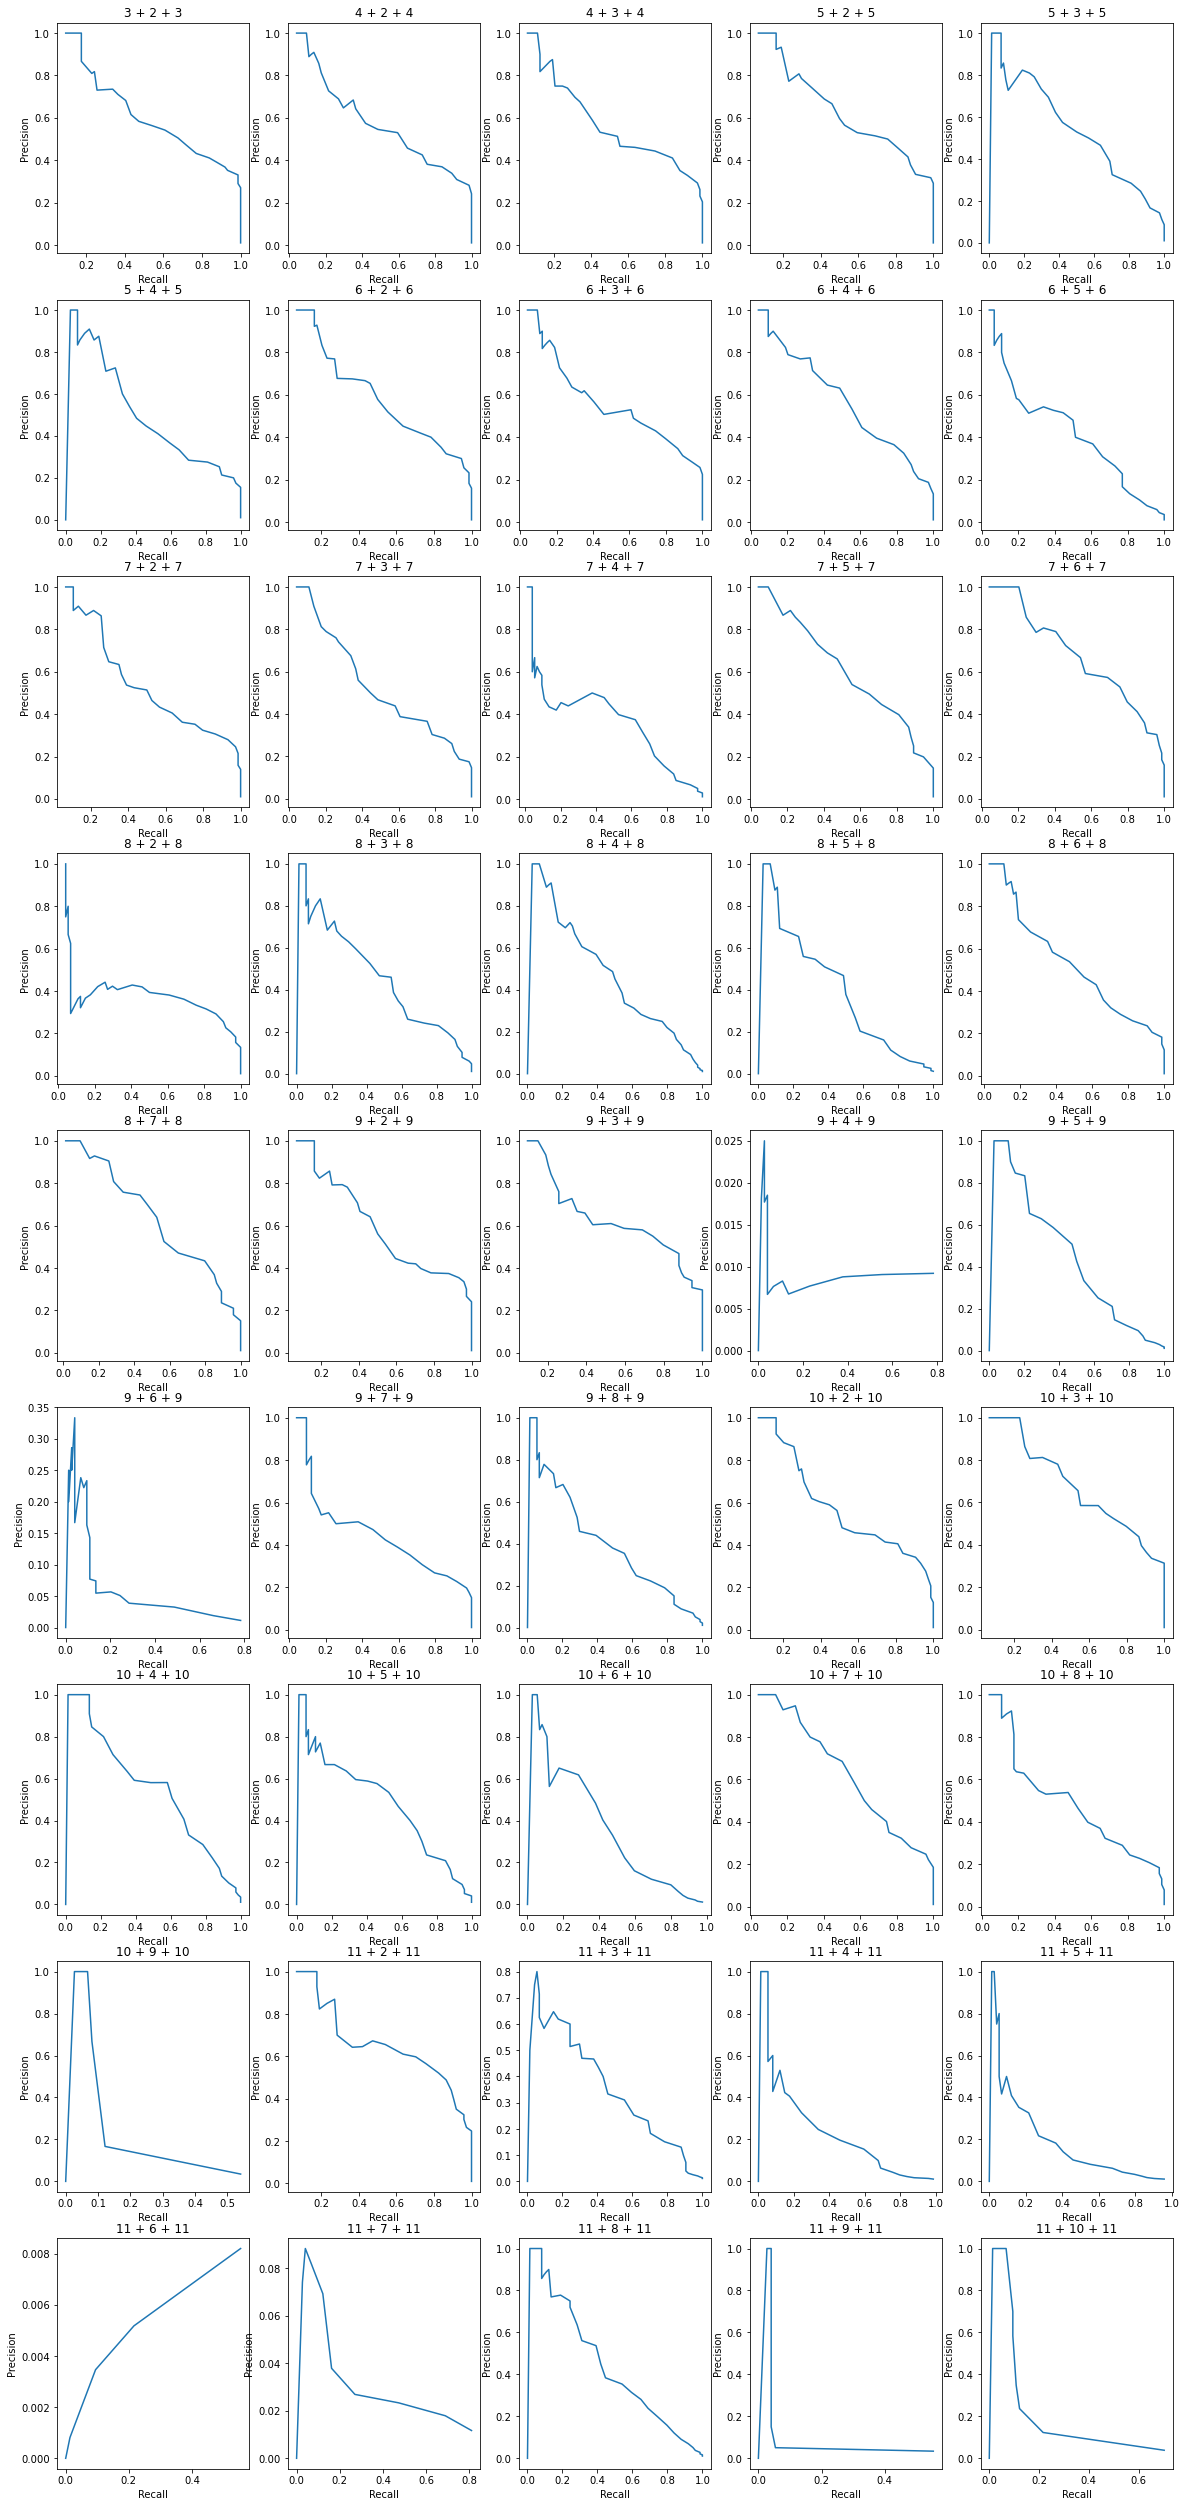

In [803]:
printCurve(rec_score_list, prc_score_list, hidden_layer_list, "Recall", "Precision")

In [805]:
def calculateAUROC(prc_list):
    AUROC_list = []
    for prec in prc_list:
        AUROC_list.append(prec.sum()/60)
    return AUROC_list

auroc_list = calculateAUROC(prc_score_list)

max_auroc = max(auroc_list)
maxauroc_index_list = [i for i, j in enumerate(auroc_list) if j == max_auroc]
best_classifier_index = maxauroc_index_list[0]

In [821]:
best_model_index = best_classifier_index
model_list[best_model_index].summary()
print(F"model {best_model_index} training loss = {history_list[best_model_index].history['loss'][-1]}")
print(F"model {best_model_index} validation loss = {history_list[best_model_index].history['val_loss'][-1]}")

Model: "sequential_265"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1060 (Dense)           (None, 8)                 104       
_________________________________________________________________
dense_1061 (Dense)           (None, 7)                 63        
_________________________________________________________________
dense_1062 (Dense)           (None, 8)                 64        
_________________________________________________________________
dense_1063 (Dense)           (None, 12)                108       
Total params: 339
Trainable params: 339
Non-trainable params: 0
_________________________________________________________________
model 20 training loss = 0.21160272549128972
model 20 validation loss = 0.22255153296788152


In [822]:
model = model_list[best_model_index]
history = history_list[best_model_index]

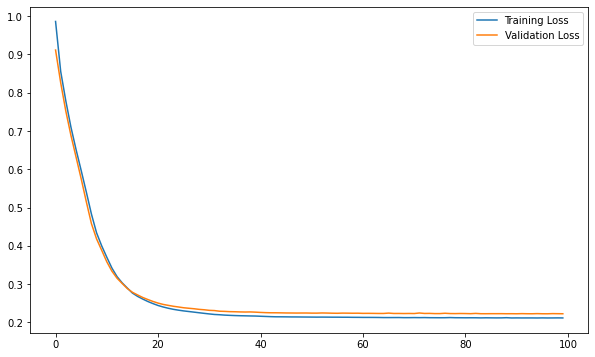

In [823]:
# print the loss with epochs
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [824]:
pred1 = model.predict(X_testing)
score1 = np.sqrt(metrics.mean_squared_error(pred1,X_testing))
print(f"Test smaples Score (RMSE): {score1}")

Test smaples Score (RMSE): 0.46472572746848767


In [825]:
# this dataframe shows the difference between the actural pm2.5 and the reconstructed pm2.5
df_diff = X_testing[:, 4] - pred1[:, 4]
diff = np.absolute(df_diff)
# diff = df_diff

In [826]:
# actural numbers of anomaly data classified by the "rule" we set
true_tag = testing_data_tag

In [828]:
threshold = np.arange(0.1, 6, 0.1)
rec_score = np.zeros(len(threshold))
# pred_tag = np.zeros(len(threshold))
prc_score = np.zeros(len(threshold))

In [830]:
for i in range(len(threshold)):
    pred_tag = (diff >= threshold[i])
    rec_score[i] = sklearn.metrics.recall_score(true_tag, pred_tag)
    prc_score[i] = sklearn.metrics.precision_score(true_tag, pred_tag)
    pred_tag = np.zeros(len(threshold))

In [831]:
def printCuv(x, y, title, xlabel, ylabel):
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y)

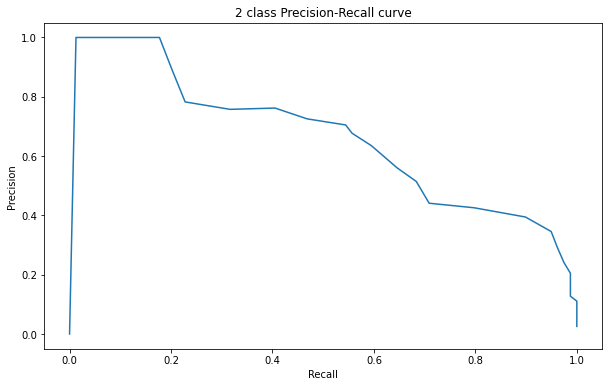

In [832]:
printCuv(rec_score, prc_score, "2 class Precision-Recall curve", "Recall", "Precision")

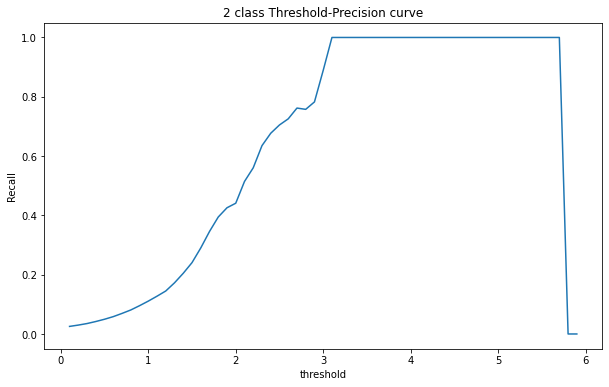

In [833]:
printCuv(threshold, prc_score, "2 class Threshold-Precision curve", "threshold", "Recall")

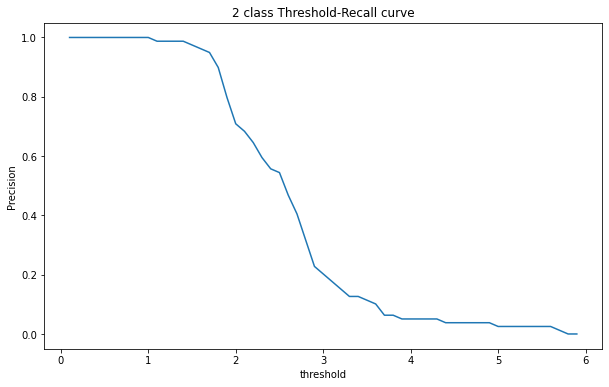

In [834]:
printCuv(threshold, rec_score, "2 class Threshold-Recall curve", "threshold", "Precision")